In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# Read in the 2018 lightning strike dataset.
mydata = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [2]:
mydata.describe()

,number_of_strikes
count,3.401012e+06
mean,1.311403e+01
std,3.212099e+01
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,1.200000e+01
max,2.211000e+03


In [3]:
# Inspect the first 10 rows.
mydata.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [4]:
mydata.shape

(3401012, 3)

In [5]:
# Get more information about the data, including data types of each column
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [6]:
# Convert date column to datetime
mydata['date']= pd.to_datetime(mydata['date'])

In [9]:
mydata.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10) 

/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_27226/3207373125.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mydata.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)


,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


In [7]:
# Create a new `month` column

##The correct way to extract the month from the 'date' column in Pandas is to use the .dt.month accessor

mydata['month']=mydata['date'].dt.month
mydata.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [8]:
# Calculate total number of strikes per month
mydata.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)

/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_27403/100113286.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mydata.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)


,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


In [9]:
# Create a new `month_txt` column.
mydata['month_txt'] = mydata['date'].dt.month_name().str.slice(stop=10)
mydata.head(12)

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,January
1,2018-01-03,41,POINT(-78.4 29),1,January
2,2018-01-03,33,POINT(-73.9 27),1,January
3,2018-01-03,38,POINT(-73.8 27),1,January
4,2018-01-03,92,POINT(-79 28),1,January
5,2018-01-03,119,POINT(-78 28),1,January
6,2018-01-03,35,POINT(-79.3 28),1,January
7,2018-01-03,60,POINT(-79.1 28),1,January
8,2018-01-03,41,POINT(-78.7 28),1,January
9,2018-01-03,119,POINT(-78.6 28),1,January


In [10]:

mydata.tail(12)

,date,number_of_strikes,center_point_geom,month,month_txt
3401000,2018-12-27,30,POINT(-94.9 31.9),12,December
3401001,2018-12-27,30,POINT(-96 32.1),12,December
3401002,2018-12-27,30,POINT(-97.6 30.4),12,December
3401003,2018-12-27,30,POINT(-97.5 30.4),12,December
3401004,2018-12-27,30,POINT(-94.5 32.7),12,December
3401005,2018-12-28,30,POINT(-90.4 28.9),12,December
3401006,2018-12-28,30,POINT(-90.2 29.1),12,December
3401007,2018-12-28,30,POINT(-90.6 28.7),12,December
3401008,2018-12-28,30,POINT(-89.4 30.9),12,December
3401009,2018-12-28,30,POINT(-89.5 31.4),12,December


In [11]:
# Create a new helper dataframe for plotting.
mydata_by_month = mydata.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
mydata_by_month

/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_27403/529589453.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mydata_by_month = mydata.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()


,month,month_txt,number_of_strikes
0,1,January,860045
1,2,February,2071315
2,3,March,854168
3,4,April,1524339
4,5,May,4166726
5,6,June,6445083
6,7,July,8320400
7,8,August,15525255
8,9,September,3018336
9,10,October,1093962


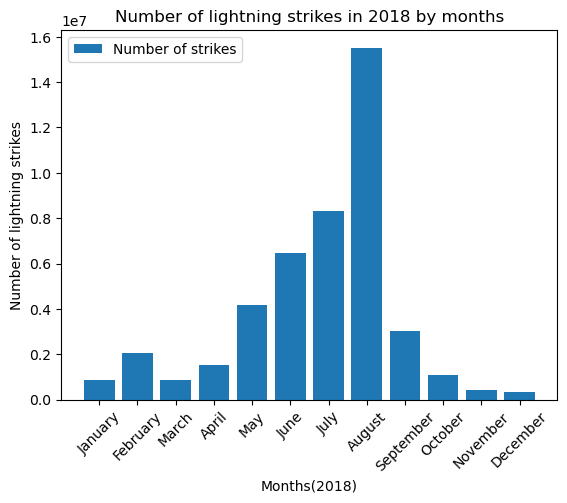

In [15]:
##create the bar plot


import matplotlib.pyplot as plt

plt.bar(x=mydata_by_month['month_txt'], height=mydata_by_month['number_of_strikes'], label="Number of strikes")
plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()

# Rotate x-axis labels by 45 degrees

plt.xticks(rotation=45)  
plt.show()








